In [29]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
folder_list=os.listdir("/content/drive/MyDrive/ML Major/AnyConv.com__dark spots")

In [32]:
folder_list

['dark spots', 'No dark spots']

In [34]:
features_train=[]
target_train=[]
for folder in folder_list:
    ImgNames_list=os.listdir("/content/drive/MyDrive/ML Major/AnyConv.com__dark spots"+"/"+folder)
    print("In Folder : ",folder)
    for imgName in ImgNames_list:
        Imgarr=cv2.imread("/content/drive/MyDrive/ML Major/AnyConv.com__dark spots"+"/"+folder+"/"+imgName)
        # there might be images of size less than 100 by 100 and so error occurs
        try:
            Imgarr=cv2.resize(Imgarr,(100,100))
        except: # we need to write atleast one line of code
            pass
        else:
            features_train.append(Imgarr)
            if folder=="No dark spots":
                target_train.append(0)
            else:
                target_train.append(1)

In Folder :  dark spots
In Folder :  No dark spots


In [35]:
features_train=np.array(features_train)
target_train=np.array(target_train)

In [36]:
features_train.shape

(331, 100, 100, 3)

In [37]:
target_train.shape

(331,)

In [38]:
features_train.ndim

4

In [39]:
target_train.ndim

1

In [40]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [41]:
features_train=np.array(list(map(preprocessing,features_train)))

In [42]:
features_train.shape

(331, 100, 100)

In [50]:
features_train=features_train.reshape(331, 100, 100,1)

In [51]:
from keras.preprocessing.image import ImageDataGenerator

In [52]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [53]:
dataGen.fit(features_train)

In [54]:
batches=dataGen.flow(features_train,target_train,batch_size=5)

In [55]:
len(batches)

67

In [56]:
images,labels=next(batches)

In [57]:
images.ndim

4

In [58]:
labels.shape

(5,)

In [59]:
images.shape

(5, 100, 100, 1)

In [60]:
import matplotlib.pyplot as plt

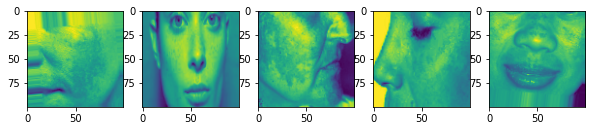

In [61]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i].reshape(100,100))
plt.show()

In [62]:
features_train.shape

(331, 100, 100, 1)

In [63]:
target_train.shape

(331,)

In [64]:
from keras.utils.np_utils import to_categorical

In [65]:
target_train=to_categorical(target_train)

In [66]:
target_train.shape

(331, 2)

In [67]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential

In [68]:
model=Sequential()
model.add(Conv2D(100,(3,3),activation="relu",input_shape=(100,100,1)))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(Conv2D(50,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

#model.add(Dropout(0.5)) # for overfitting model

model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax")) 

In [69]:
from keras.optimizers import Adam

In [70]:
model.compile(Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [71]:
model.fit(dataGen.flow(features_train,target_train,batch_size=5),epochs=50)

Epoch 1/50
67/67 [==============================] - 77s 913ms/step - loss: 0.5560 - accuracy: 0.8782
Epoch 2/50
67/67 [==============================] - 61s 906ms/step - loss: 0.3088 - accuracy: 0.9138
Epoch 3/50
67/67 [==============================] - 60s 902ms/step - loss: 0.3017 - accuracy: 0.9062
Epoch 4/50
67/67 [==============================] - 61s 912ms/step - loss: 0.2575 - accuracy: 0.8968
Epoch 5/50
67/67 [==============================] - 61s 907ms/step - loss: 0.1918 - accuracy: 0.9454
Epoch 6/50
67/67 [==============================] - 61s 911ms/step - loss: 0.2149 - accuracy: 0.9085
Epoch 7/50
67/67 [==============================] - 62s 918ms/step - loss: 0.1257 - accuracy: 0.9478
Epoch 8/50
67/67 [==============================] - 61s 914ms/step - loss: 0.1237 - accuracy: 0.9560
Epoch 9/50
67/67 [==============================] - 62s 919ms/step - loss: 0.1559 - accuracy: 0.9393
Epoch 10/50
67/67 [==============================] - 62s 919ms/step - loss: 0.1566 - accura

In [73]:
model_json=model.to_json() # converting to json file
with open("DarkSpots.json","w") as abc:
    abc.write(model_json)
    abc.close()
model.save_weights("DarkSpotsWeights.h5") # saving the weights as hdf 5 file
print("Save the Model")

Save the Model


In [74]:
from keras.models import model_from_json
json_file=open("DarkSpots.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("DarkSpotsWeights.h5")
print("Loaded model successfully")

Loaded model successfully


In [75]:
def getClassName(classNo):
    if classNo == 0: return "No Dark Spots"
    elif classNo == 1: return "Dark Spots"